In [ ]:
!pip install pycaret

In [2]:
from pycaret.datasets import get_data
dataset=get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data_seen = dataset.sample(frac=0.95, random_state=780).reset_index(drop=True)
data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142, 5)
Unseen Data For Predictions: (8, 5)


In [4]:
data_seen

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.4,1.5,0.4,Iris-setosa
1,4.4,3.2,1.3,0.2,Iris-setosa
2,4.9,2.4,3.3,1.0,Iris-versicolor
3,7.6,3.0,6.6,2.1,Iris-virginica
4,4.6,3.2,1.4,0.2,Iris-setosa
...,...,...,...,...,...
137,6.8,2.8,4.8,1.4,Iris-versicolor
138,5.6,3.0,4.5,1.5,Iris-versicolor
139,5.6,3.0,4.1,1.3,Iris-versicolor
140,5.8,4.0,1.2,0.2,Iris-setosa


In [5]:
data_unseen

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.7,5.1,1.9,Iris-virginica
1,6.8,3.2,5.9,2.3,Iris-virginica
2,6.7,3.3,5.7,2.5,Iris-virginica
3,6.7,3.0,5.2,2.3,Iris-virginica
4,6.3,2.5,5.0,1.9,Iris-virginica
5,6.5,3.0,5.2,2.0,Iris-virginica
6,6.2,3.4,5.4,2.3,Iris-virginica
7,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
from pycaret.classification import *

In [7]:
clf=setup(data=data_seen,target='species',session_id=123,ignore_low_variance=True,normalize=True,transformation=True)

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(142, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.99,1.0000,0.9917,0.9925,0.9900,0.9851,0.9864,0.017
lda,Linear Discriminant Analysis,0.99,1.0000,0.9889,0.9920,0.9896,0.9846,0.9860,0.017
ada,Ada Boost Classifier,0.98,0.9954,0.9806,0.9800,0.9800,0.9697,0.9697,0.088
et,Extra Trees Classifier,0.98,1.0000,0.9778,0.9840,0.9791,0.9692,0.9720,0.440
lightgbm,Light Gradient Boosting Machine,0.98,0.9938,0.9778,0.9840,0.9791,0.9692,0.9720,0.039
lr,Logistic Regression,0.97,0.9955,0.9694,0.9765,0.9691,0.9543,0.9583,0.306
knn,K Neighbors Classifier,0.97,0.9917,0.9694,0.9765,0.9691,0.9543,0.9583,0.119
nb,Naive Bayes,0.97,0.9969,0.9694,0.9720,0.9696,0.9543,0.9557,0.018
dt,Decision Tree Classifier,0.97,0.9762,0.9694,0.9720,0.9696,0.9543,0.9557,0.017
rf,Random Forest Classifier,0.97,0.9938,0.9694,0.9720,0.9696,0.9543,0.9557,0.465


In [9]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
1,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
2,0.90,1.0,0.9167,0.9250,0.90,0.8507,0.8636
3,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
4,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
5,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
6,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
7,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
8,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000
9,1.00,1.0,1.0000,1.0000,1.00,1.0000,1.0000


In [10]:
tune_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
1,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
2,0.90,0.9381,0.8889,0.920,0.8956,0.8462,0.8598
3,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
4,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
5,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
6,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
7,0.90,1.0000,0.8889,0.920,0.8956,0.8462,0.8598
8,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000
9,1.00,1.0000,1.0000,1.000,1.0000,1.0000,1.0000


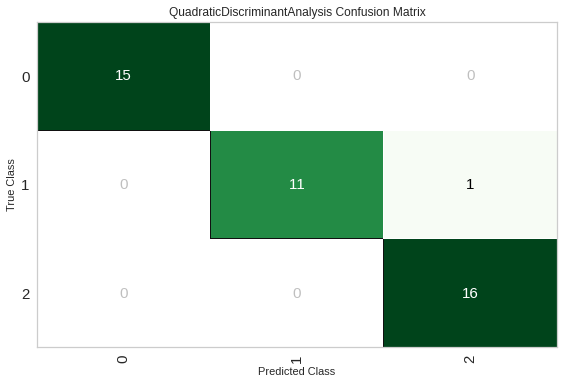

In [11]:
plot_model(qda,plot='confusion_matrix')

In [12]:
final_qda=finalize_model(qda)

In [13]:
unseen_predictions=predict_model(final_qda,data=data_unseen)
unseen_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica,0.9999
1,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica,1.0000
2,6.7,3.3,5.7,2.5,Iris-virginica,Iris-virginica,1.0000
3,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,1.0000
4,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.9999


In [14]:
save_model(final_qda,'final qda model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='species')),
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),

In [15]:
data_unseen.to_csv('/content/iris_pred.csv')